ab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.




Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [2]:
import pandas as pd

# Replace 'dataset.csv' with the actual filename if it's different
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df.head(20)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


1.1 Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [5]:
# Generating a crosstab for 'MSZoning' and 'SaleCondition'

crosstab_result1 = pd.crosstab(df['category'], df['isBestSeller'])




In [6]:
crosstab_result1

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
total_count_per_category = crosstab_result1.sum(axis=1)


In [8]:
total_count_per_category

category
3D Printers                         248
3D Printing & Scanning             4067
Abrasive & Finishing Products       250
Action Cameras                     1697
Adapters                            254
                                  ...  
Wind Instruments                    250
Window Treatments                   239
Women                             17772
Women's Sports & Outdoor Shoes     1959
eBook Readers & Accessories         246
Length: 296, dtype: int64

In [9]:

# Calculate the proportion of True values (best sellers) per category
crosstab_result1_frec=crosstab_result1.div(total_count_per_category,axis=0)

In [10]:
crosstab_result1_frec.sort_values(True)

isBestSeller,False,True
category,,
eBook Readers & Accessories,1.000000,0.000000
Boxes & Organisers,1.000000,0.000000
"CD, Disc & Tape Players",1.000000,0.000000
CPUs,1.000000,0.000000
Snowboard Boots,1.000000,0.000000
...,...,...
Power & Hand Tools,0.964661,0.035339
Mobile Phone Accessories,0.957529,0.042471
Health & Personal Care,0.942314,0.057686


In [11]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category. 
#Compute Cramér's V to understand the strength of association between best-seller status and category. Visualizations:

#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [12]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result1)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [13]:
#The null hypothesis of the Chi-square test is that the two categorical variables are independent.
#Given the extremely low ( p )-value 0,0, we reject the null hypothesis. 
#This implies that there's a significant association between MSZoning and SaleCondition in the dataset.

In [14]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result1, method="cramer")

0.1222829439760564

In [15]:
#The Cramér's V value of 0.1222829439760564
# suggests a weak association between the two variables. 
#Though statistically significant, the strength of this relationship is not very strong,

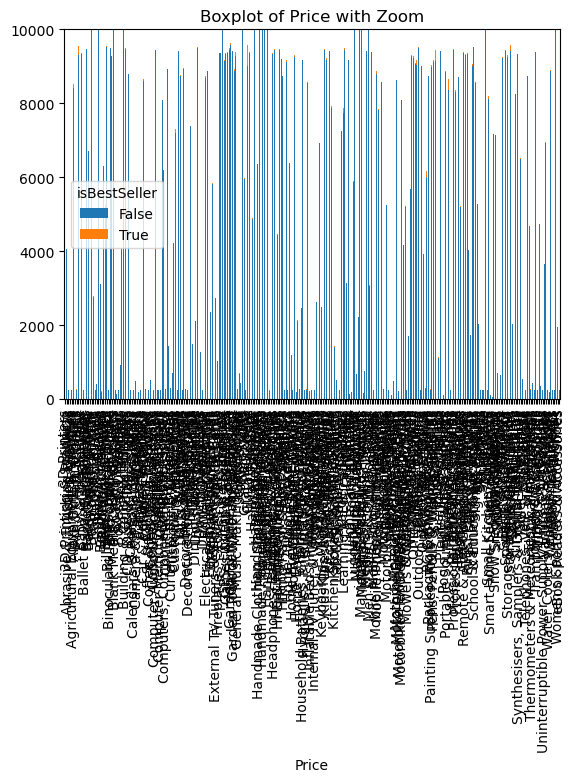

In [16]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result1.plot(kind="bar", stacked=True)
plt.ylim(0, 10000)  # Adjust the limits as per your requirement

# Optionally, you can add labels and customize the plot further
plt.xlabel('Price')
plt.title('Boxplot of Price with Zoom')
plt.show()

###Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [17]:

Q1 = df['price'].quantile(0.25) # quantile method to df price
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with prices outside the bounds
df_sin_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [18]:
df_sin_outliers#  we removed 

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [19]:
df_sin_outliers["price"].count() -df["price"].count() # total removed 

-327688

In [20]:
# Frequency table for 'category'
frequency_table=df_sin_outliers["category"].value_counts()


In [21]:
frequency_table.head(20)

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

In [22]:
top_products=["Sports & Outdoors",
"Beauty",
"Bath & Body",
"Manicure & Pedicure Products",
"Handmade Clothing, Shoes & Accessories",
"Make-up",
"Skin Care",
"Hair Care",
"Birthday Gifts",
"Handmade Gifts",
"Handmade Home Décor",
"Luggage and travel gear",
"Women",
"Fragrances",
"Handmade Kitchen & Dining",
"Handmade Artwork",
"Handmade Home & Kitchen Products",
"Handmade Jewellery",
"Men",
"Baby"]

In [23]:
df_20=df_sin_outliers[df_sin_outliers["category"].isin(top_values)][["category","price"]]

NameError: name 'top_values' is not defined

In [ ]:
df_20 = df_sin_outliers[df_sin_outliers["category"].isin(top_products)][["category", "price"]]

In [ ]:
sns.violinplot(data=df_20, x='category', y='price', palette="coolwarm") 
plt.ylim(0, 60)
plt.figure(figsize=(39, 25))  


In [ ]:
df_20.groupby("category")["price"].median()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

median_prices=df_20=df_sin_outliers.groupby("category")["price"].median().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=median_prices.index, y=median_prices.values, palette="coolwarm")
#########################################################################################3
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel("Product Category")
plt.ylabel("Median Price")
plt.title("Median Price by Product Category")
plt.tight_layout()
plt.show()   # got this from chatgpt, not gonna waste time with graphics, sorry 

In [ ]:
df_10=df_sin_outliers[df_sin_outliers["category"].isin(top_products[0:10])][["category","price"]]

In [ ]:
mean_prices=df_10.groupby("category")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette="coolwarm")

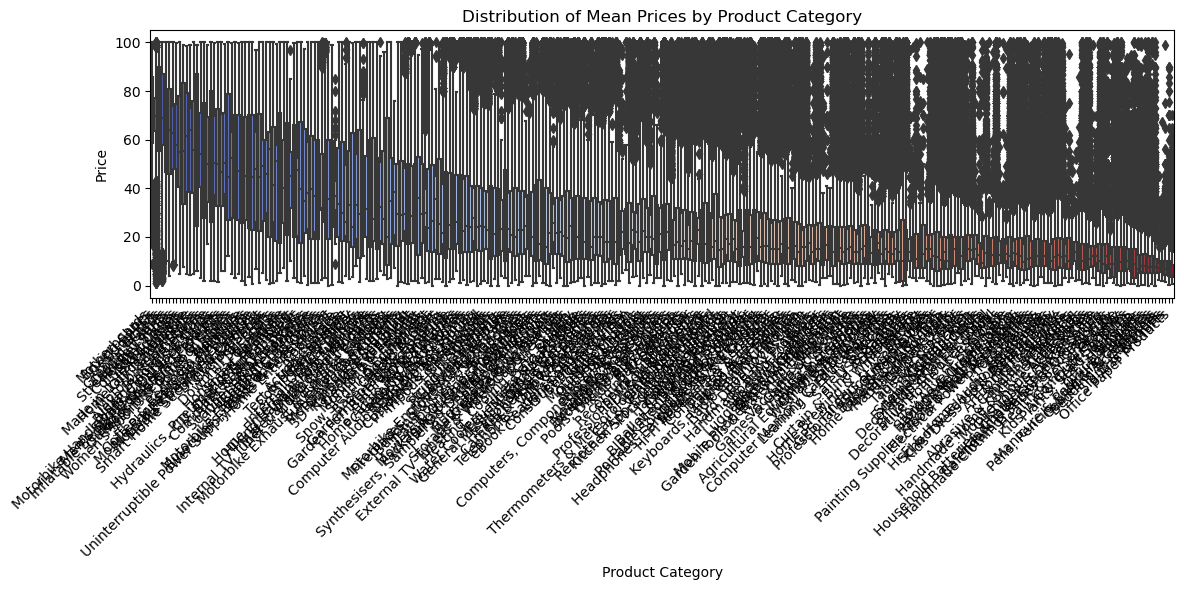

In [24]:
mean_prices = df_sin_outliers.groupby("category")["price"].mean().sort_values(ascending=False)

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_outliers, x='category', y='price', order=mean_prices.index, palette="coolwarm")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.title("Distribution of Mean Prices by Product Category")
plt.tight_layout()
plt.show()

In [25]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categ

In [26]:
df_sin_outliers.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
df_sin_outliers[["category","stars"]]

,category,stars
0,Hi-Fi Speakers,4.7
1,Hi-Fi Speakers,4.7
2,Hi-Fi Speakers,4.7
3,Hi-Fi Speakers,4.7
4,Hi-Fi Speakers,4.6
...,...,...
2443646,Motorbike Clothing,0.0
2443647,Motorbike Clothing,0.0
2443648,Motorbike Clothing,0.0
2443649,Motorbike Clothing,4.3


In [28]:
df_20 = df_sin_outliers[df_sin_outliers["category"].isin(top_products)][["category", "price"]]

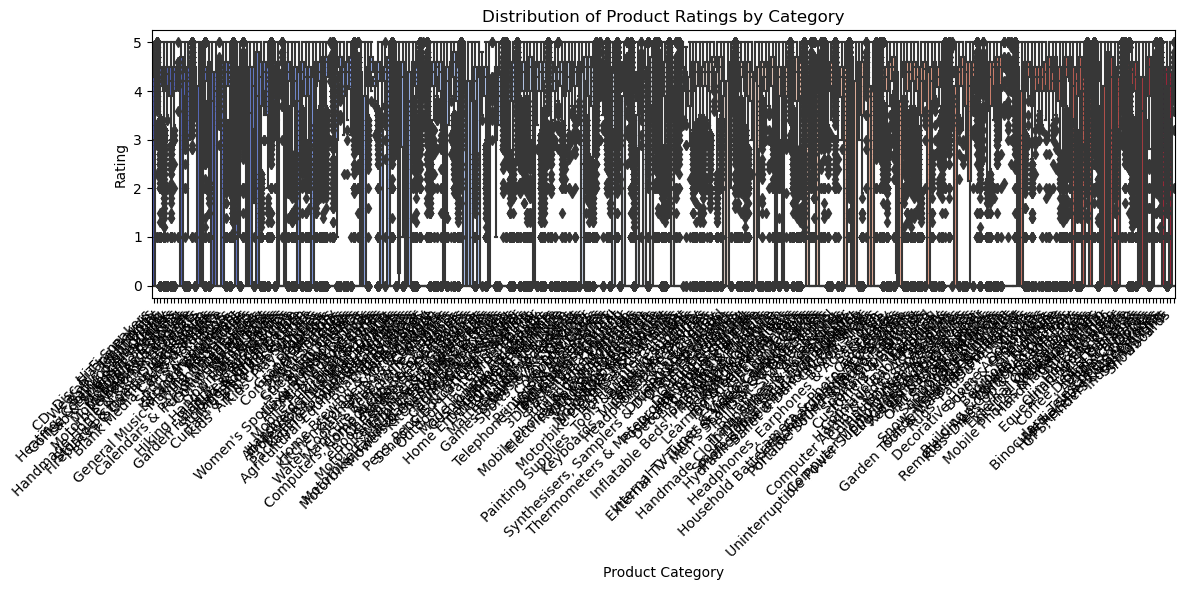

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_outliers, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel("Product Category")
plt.ylabel("Rating")
plt.title("Distribution of Product Ratings by Category")
plt.tight_layout()
plt.show()

In [30]:
df_10=df_sin_outliers[df_sin_outliers["category"].isin(top_products[0:10])][["category","stars"]]

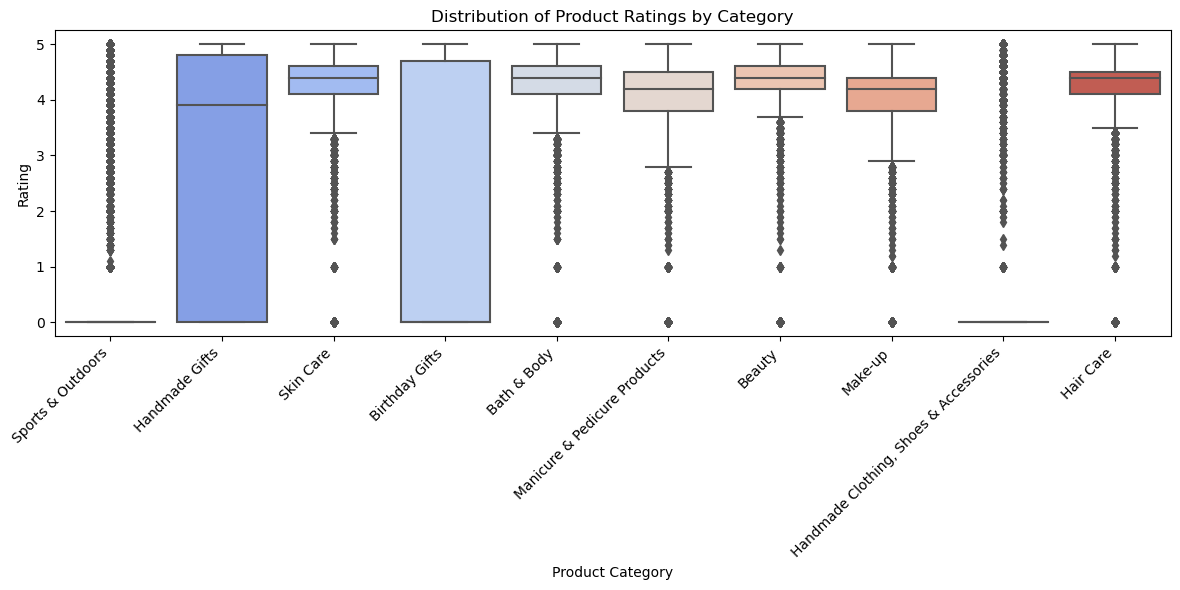

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_10, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel("Product Category")
plt.ylabel("Rating")
plt.title("Distribution of Product Ratings by Category")
plt.tight_layout()
plt.show()

In [32]:
median_stars_by_category = df_sin_outliers.groupby("category")["stars"].median().sort_values(ascending=False)

In [33]:
median_stars_by_category

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.


In [34]:
correlation = df["price"].corr(df['stars'])
correlation


-0.1249067326214861

In [35]:
df_corr=df[['price',"stars"]]

In [36]:
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.1331642546243379

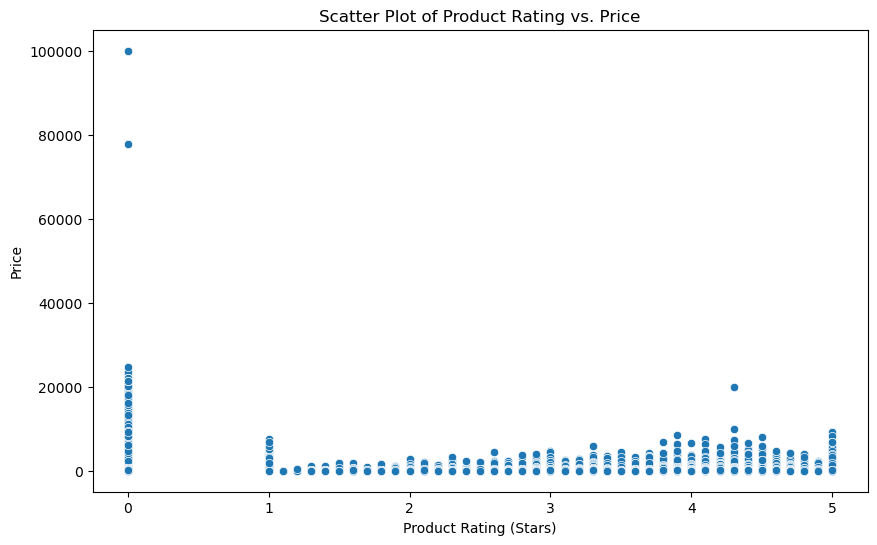

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df)
plt.title('Scatter Plot of Product Rating vs. Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.show()

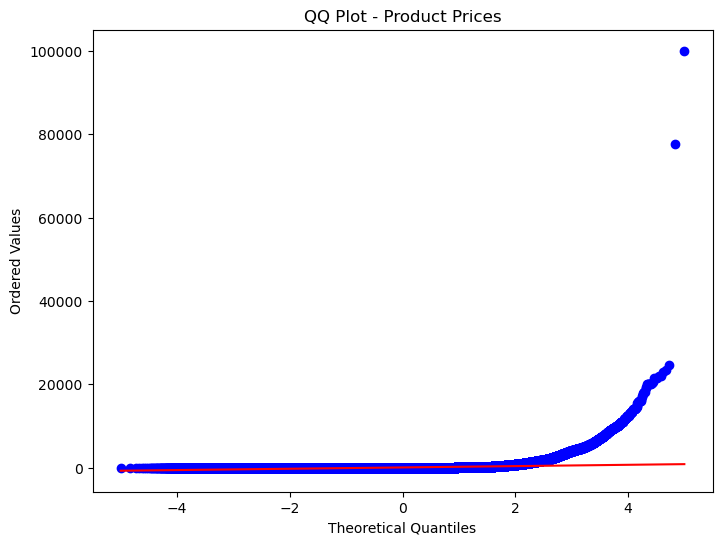

In [39]:
import scipy.stats as stats
import numpy as np

# QQ plot for price
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot - Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()